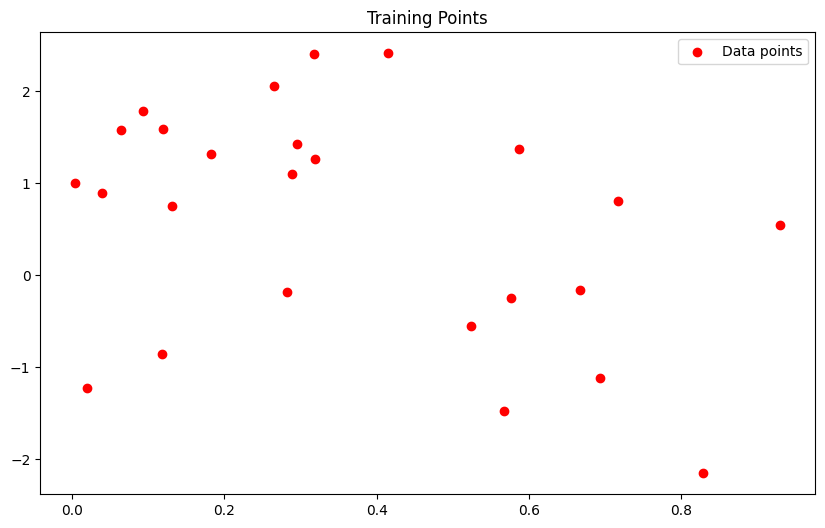

1


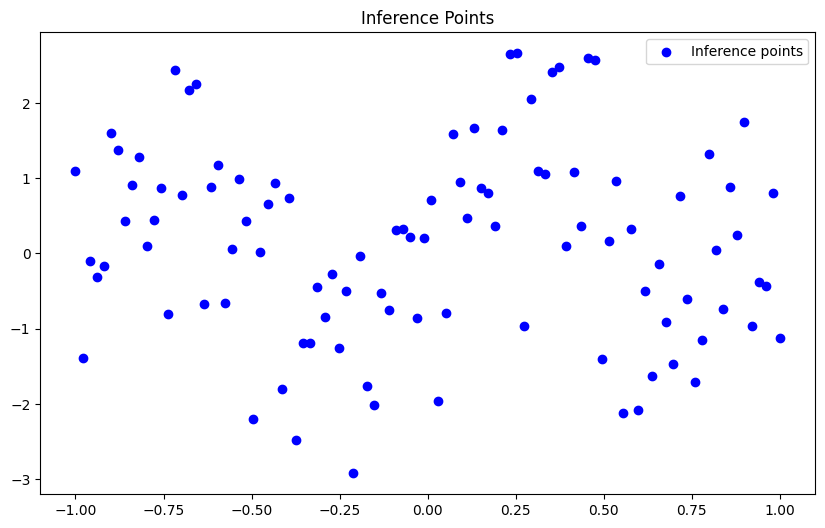

M :  25
x :  [0.0392 0.2828 0.1202 0.2961 0.1187 0.318  0.4143 0.0641 0.6925 0.5666
 0.2654 0.5232 0.0939 0.5759 0.9293 0.3186 0.6674 0.1318 0.7163 0.2894
 0.1832 0.5865 0.0201 0.8289 0.0047]
shape S_n :  (26, 26)
M :  25
x :  [-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.2727

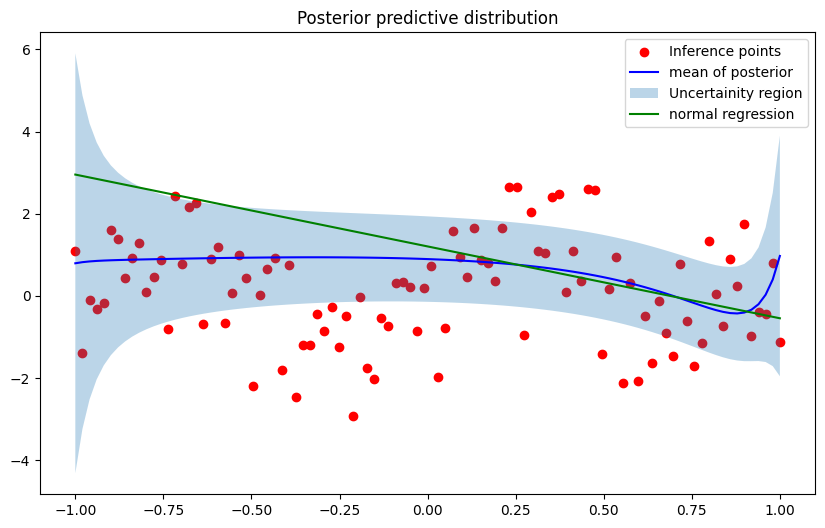

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sin
import numpy as np
from sklearn.linear_model import LinearRegression


# xi = random decimals
# ti = sin2pix + gaussian noise(x , u = 0 , var = 1)
xi = np.array([0.0392, 0.2828, 0.1202, 0.2961, 0.1187, 0.3180, 0.4143, 0.0641, 0.6925, 0.5666, 0.2654, 0.5232, 0.0939, 0.5759, 0.9293, 0.3186, 0.6674, 0.1318, 0.7163, 0.2894, 0.1832, 0.5865, 0.0201, 0.8289, 0.0047])
t = np.array([0.8905, -0.1863, 1.5863, 1.4239, -0.8575, 2.3984, 2.4089, 1.5710, -1.1153, -1.4771, 2.0498, -0.5487, 1.7790, -0.2510, 0.5469, 1.2650, -0.1618, 0.7472, 0.8082, 1.0964, 1.3152, 1.3660, -1.2218, -2.1500, 0.9989])

M = 25 #polynomial degree = 25

def design_matrix(x , M):
  print("M : " , M)
  print("x : " , x)
  return np.vander(x, M+1, increasing = True)

def bayesian_linear_regression(x , t , M , alpha , beta):
  #goal : finding the posterior distribution's mean and variance
  phi = design_matrix(x , M)
  S_n = np.linalg.inv(alpha*np.eye(M+1)+beta*phi.T @ phi )
  print("shape S_n : " , S_n.shape)
  mean = beta *S_n @ phi.T @ t
  return S_n , mean


def predictive_distribution(x_star , m_n , S_n  , M , beta):
  phi_star = design_matrix(x_star.flatten() , M)
  mean =phi_star @ m_n
  print("shape phi_star : " , phi_star.shape)
  print("shape s_n :  " , S_n.shape)
  var = 1/beta + (phi_star @ S_n) @ phi_star.T
  var = np.diag(var)
  return mean , var


def plotting_regressions(x_star , t_star , mean , var , predictions):
  plt.figure(figsize=(10, 6))
  plt.scatter(x_star , t_star , color = 'red' , label = 'Inference points')
  plt.plot(x_star , mean  , 'b'  , label = 'mean of posterior')
  plt.fill_between(x_star, mean - np.sqrt(var) , mean+ np.sqrt(var) , alpha  = 0.3 , label = 'Uncertainity region')
  plt.plot(x_star.reshape(-1,1), predictions  , color = 'green' , label = 'normal regression')
  plt.title('Posterior predictive distribution')
  plt.legend()
  plt.show()

plt.figure(figsize=(10, 6))
plt.sc atter(xi , t , color = 'red' , label = 'Data points')
plt.legend()
plt.title('Training Points')
plt.show()

x_star = np.linspace(-1 ,1  ,100)
print(x_star.ndim)
t_star =[]
for i in range(0 , 100):
  t_star.append(sin(2*pi*x_star[i]) + np.random.normal(0 , 1))


t_star = np.array(t_star)
plt.figure(figsize=(10, 6))
plt.scatter(x_star , t_star , color = 'blue' , label = 'Inference points')
plt.legend()
plt.title('Inference Points')
plt.show()

#use linear regression for the same dataset from scikit-learn library
reg = LinearRegression().fit(xi.reshape(-1, 1), t)
predictions = reg.predict(x_star.reshape(-1, 1))

posterior_var  , posterior_mean  = bayesian_linear_regression(xi , t , M , 1 , 1 )
pred_mean , pred_var = predictive_distribution(x_star , posterior_mean , posterior_var  , M , 1)


plotting_regressions(x_star , t_star ,pred_mean , pred_var , predictions )

